In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [9]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [16]:
# df.columns
# len(df)
# df.shape
df.drop(['Gate location'], axis=1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [19]:
df.dtypes
df = df.rename(columns={
    'Customer Type': 'Customer_Type ',
    'Type of Travel': 'Type_of_Travel',
    'Flight Distance': 'Flight_Distance',
    'Inflight wifi service': 'Inflight_Wifi_Service',
    'Departure/Arrival time convenient': 'Departure_or_Arrival_Time_Convenient',
    'Ease of Online booking': 'Ease_of_Online_Booking',
    'Gate location': 'Gate_Location',
    'Food and drink': 'Food_and_Drink',
    'Online boarding': 'Online_Boarding',
    'Seat comfort': 'Seat_Comfort',
    'Inflight entertainment': 'Inflight_Entertainment',
    'On-board service': 'Onboard_Bervice',
    'Leg room service': 'Leg_Room_Service',
    'Baggage handling': 'Baggage_Handling',
    'Checkin service': 'Checkin_Service',
    'Inflight service': 'Inflight_Service',
    'Departure Delay in Minutes': 'Departure_Delay_in_Mins',
    'Arrival Delay in Minutes': 'Arrival_Delay_in_Mins'
})

In [21]:
# df.isna()
df.isna().sum()

Unnamed: 0                                0
id                                        0
Gender                                    0
Customer_Type                             0
Age                                       0
Type_of_Travel                            0
Class                                     0
Flight_Distance                           0
Inflight_Wifi_Service                     0
Departure_or_Arrival_Time_Convenient      0
Ease_of_Online_Booking                    0
Gate_Location                             0
Food_and_Drink                            0
Online_Boarding                           0
Seat_Comfort                              0
Inflight_Entertainment                    0
Onboard_Bervice                           0
Leg_Room_Service                          0
Baggage_Handling                          0
Checkin_Service                           0
Inflight_Service                          0
Cleanliness                               0
Departure_Delay_in_Mins         

In [23]:
# df.duplicated()
df.loc[df.duplicated()]

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_Wifi_Service,Departure_or_Arrival_Time_Convenient,Ease_of_Online_Booking,Gate_Location,Food_and_Drink,Online_Boarding,Seat_Comfort,Inflight_Entertainment,Onboard_Bervice,Leg_Room_Service,Baggage_Handling,Checkin_Service,Inflight_Service,Cleanliness,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,satisfaction


In [25]:
df.duplicated(subset=['id']).sum()

0

Text(0, 0.5, 'Number of travellers')

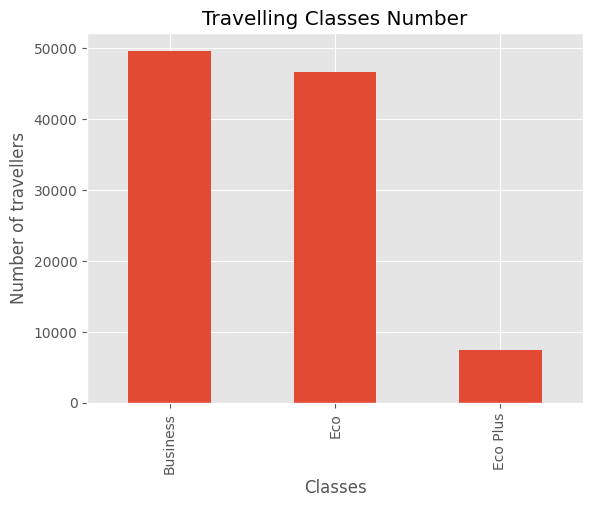

In [32]:
ax = df['Class'].value_counts() \
    .plot(kind='bar', title='Travelling Classes Number')
ax.set_xlabel('Classes')
ax.set_ylabel('Number of travellers')

Text(0.5, 0, 'Ages')

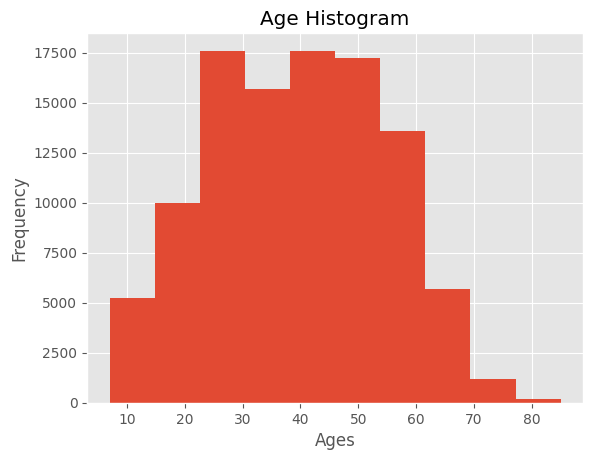

In [34]:
age = df['Age'].plot(kind='hist', title='Age Histogram')
age.set_xlabel('Ages')

<Axes: title={'center': 'Age against Ease of online booking'}, xlabel='Flight_Distance', ylabel='Seat_Comfort'>

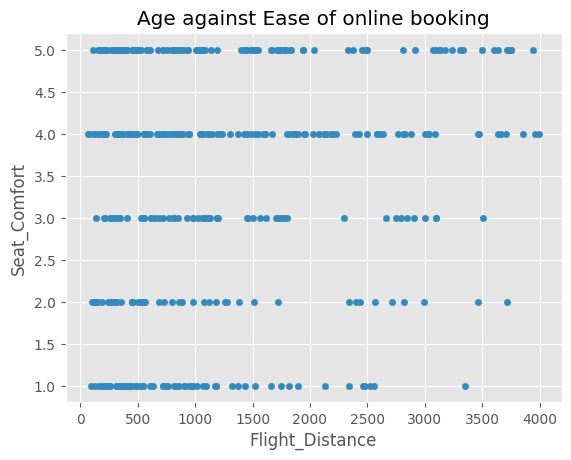

In [99]:
df.head(400).plot(
    kind='scatter',
    x='Flight_Distance',
    y='Seat_Comfort',
    title='Age against Ease of online booking'
)